In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("BostonHousing.csv")
df = pd.DataFrame(data)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [4]:
df.fillna(df.mean(),inplace=True)

In [5]:
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- TAX: Full-value property-tax rate per $10,000.
- MEDV: Median value of owner-occupied homes in $1000's (target variable)

In [6]:
X = df[['rm','age','tax']]
Y = df['medv']

In [7]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [8]:
print("Intercept (B0): ", model.intercept_)
print("Coefficeient (B value): ", model.coef_)

Intercept (B0):  -18.988225377814448
Coefficeient (B value):  [ 7.84912009 -0.03724001 -0.01286455]


In [9]:
# using data frame
df['Predicted Price'] = model.predict(X)
df['Predicted Price']

0      26.383783
1      25.359516
2      32.019116
3      31.378394
4      32.235097
         ...    
501    26.675716
502    22.680058
503    28.866373
504    27.501141
505    21.820953
Name: Predicted Price, Length: 506, dtype: float64

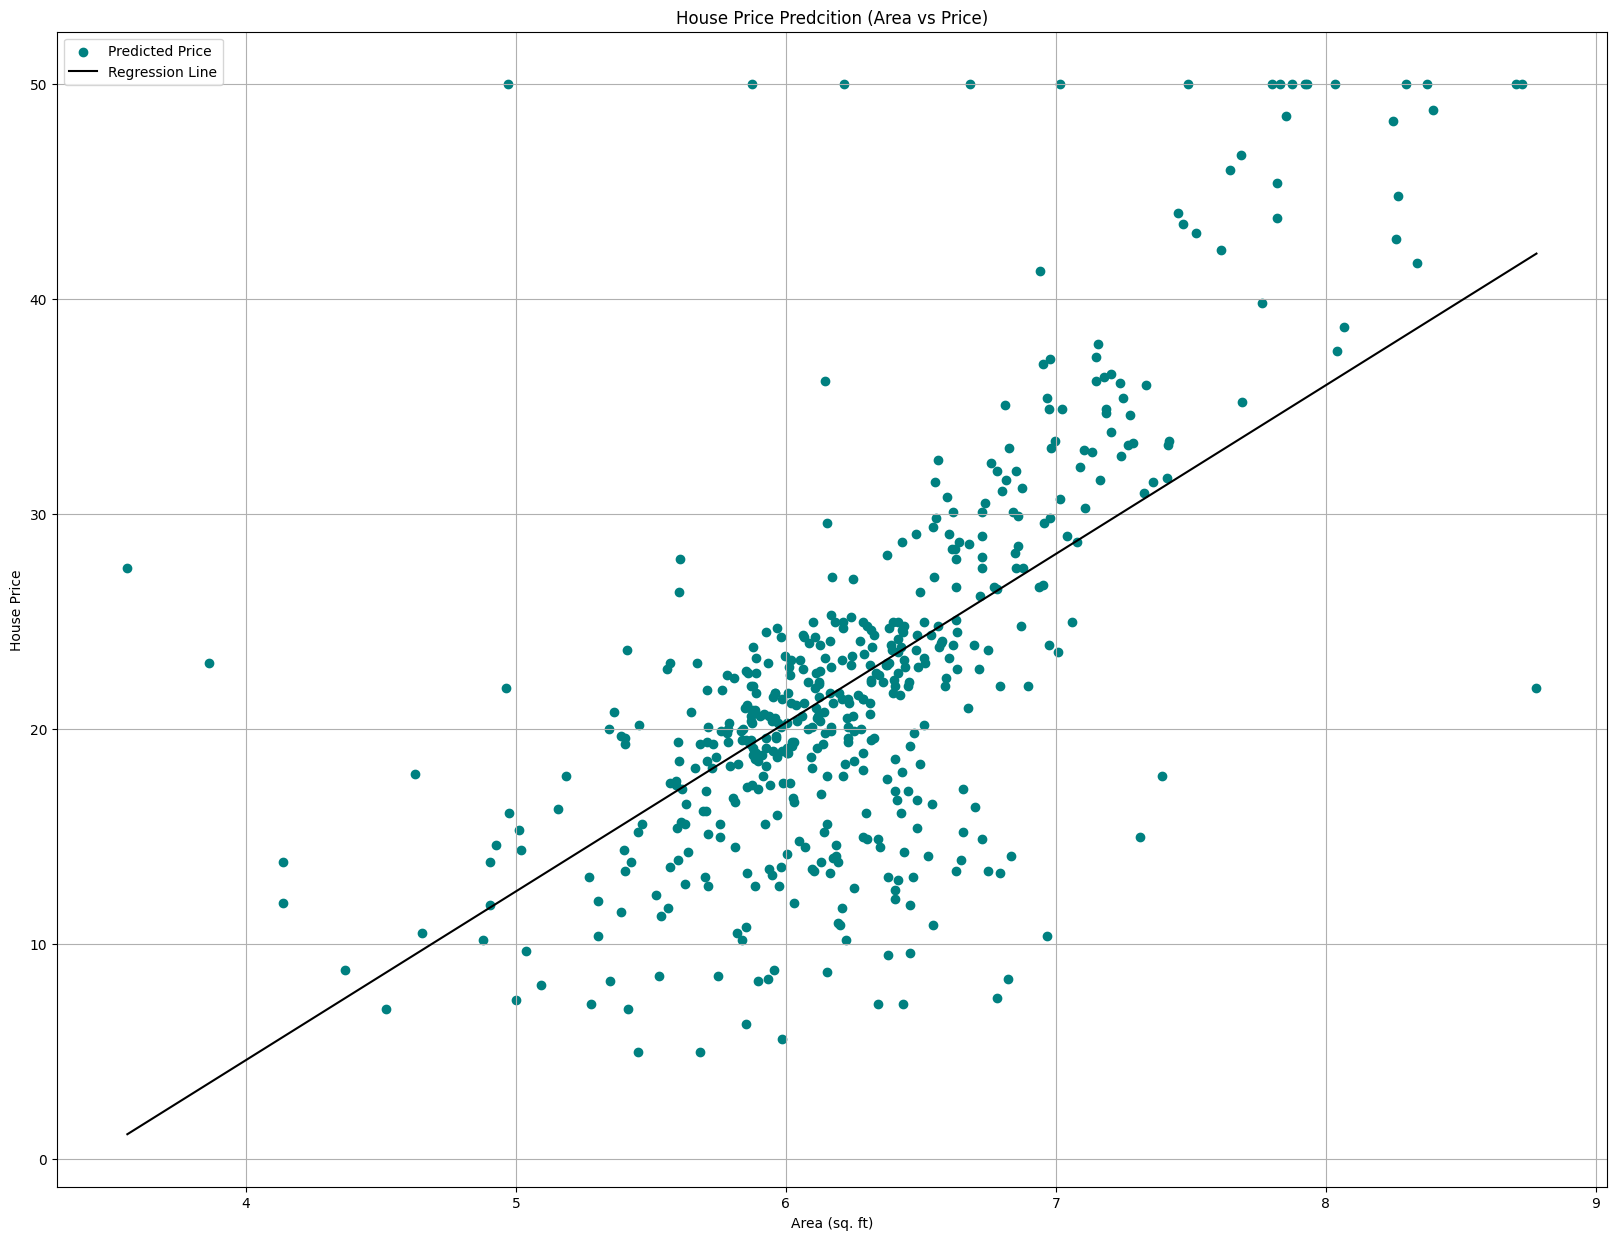

c:\Users\yashg_t6wet39\Documents\Data Science\regression_plot.png

In [14]:
plt.figure(figsize=(20,15))
plt.scatter(df['rm'],df['medv'], color = "teal", label='Predicted Price')    

area_range = np.linspace(df['rm'].min(), df['rm'].max())
age_mean = df['age'].mean()
tax_mean = df['tax'].mean()

predicted_price = (model.intercept_ + 
                   model.coef_[0] * area_range +
                   model.coef_[1] * age_mean +
                   model.coef_[2] * tax_mean
                  )

plt.plot(area_range, predicted_price, color = 'black', label ='Regression Line')

plt.xlabel('Area (sq. ft)')
plt.ylabel('House Price')
plt.title('House Price Predcition (Area vs Price)')
plt.legend()
plt.grid()
plt.savefig('regression_plot.png')

plt.show()
from IPython.display import FileLink
FileLink('regression_plot.png')